<a href="https://colab.research.google.com/github/lettuceburger/cheese/blob/master/Helmet_traffic_Labelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
## Initialising the CNN
classifier = Sequential()

In [ ]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [ ]:
## Flattening
classifier.add(Flatten())

In [ ]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [ ]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [ ]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2,horizontal_flip=True
                                   )

In [ ]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
## Importing training data
train_set = train_datagen.flow_from_directory('/content/drive/My Drive/helmet_detection/training',
                                               target_size=(64, 64),
                                               
                                               class_mode='binary')

Found 647 images belonging to 2 classes.


In [ ]:
train_set.class_indices

{'with helmet': 0, 'without helmet': 1}

In [ ]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'with helmet': 0, 'without helmet': 1}


In [ ]:
## Importng test data
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/helmet_detection/testing',
                                            target_size=(64, 64),
                                            
                                            class_mode='binary')

Found 208 images belonging to 2 classes.


In [ ]:
classifier.fit_generator(
        train_set,
        epochs=50,
        validation_data=test_set
        )




Epoch 1/50





21/21 [==============================] - 109s 5s/step - loss: 0.6212 - acc: 0.6476 - val_loss: 0.4412 - val_acc: 0.8365
Epoch 2/50
21/21 [==============================] - 9s 409ms/step - loss: 0.5434 - acc: 0.7460 - val_loss: 0.6890 - val_acc: 0.6106
Epoch 3/50
21/21 [==============================] - 9s 408ms/step - loss: 0.4675 - acc: 0.7850 - val_loss: 0.3611 - val_acc: 0.8606
Epoch 4/50
21/21 [==============================] - 9s 406ms/step - loss: 0.4253 - acc: 0.8205 - val_loss: 0.3776 - val_acc: 0.8269
Epoch 5/50
21/21 [==============================] - 9s 406ms/step - loss: 0.3737 - acc: 0.8324 - val_loss: 0.3519 - val_acc: 0.8317
Epoch 6/50
21/21 [==============================] - 8s 403ms/step - loss: 0.3967 - acc: 0.8226 - val_loss: 0.3667 - val_acc: 0.8365
Epoch 7/50
21/21 [==============================] - 9s 407ms/step - loss: 0.3669 - acc: 0.8417 - val_loss: 0.6880 - val_acc: 0.7212
Epoch 8/50
21/21 [==============================] - 9s 408ms/step - l

In [ ]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('/content/drive/My Drive/helmet_detection/single_prediction/110.jpg'
                           ,target_size =(64,64))


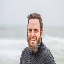

In [ ]:
test_image


In [ ]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [ ]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,64,64,3)

In [ ]:
result = classifier.predict(test_image)
result

array([[1.]], dtype=float32)

In [ ]:
## Class label of dog and cat

if result == 1:
    prediction = 'without helmet'
else:
   prediction = 'helmet'
    

In [ ]:
prediction

'helmet'